<a href="https://colab.research.google.com/github/nitkum41/Machine-Learning/blob/main/rnn_basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
np.random.seed(0)

In [ ]:
t = np.arange(0,1500)

In [ ]:
print(t)

[   0    1    2 ... 1497 1498 1499]


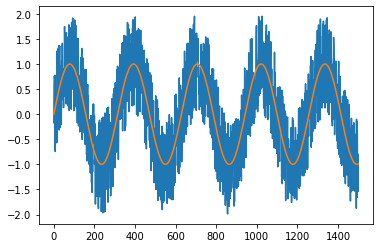

In [ ]:
x=np.sin(0.02*t) + np.random.uniform(low=-1,high=1,size=(1500,))
plt.plot(x)

x_org = np.sin(0.02*t)
plt.plot(x_org)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
normalizer = MinMaxScaler(feature_range=(0, 1))
x = (np.reshape(x, (-1, 1)))
x = normalizer.fit_transform(x)
print(x)

[[0.46081124]
 [0.57538173]
 [0.65609017]
 ...
 [0.30250314]
 [0.11328945]
 [0.20883216]]


In [ ]:

train = x[0:1000]
test = x[1000:]
print(train.shape)

(1000, 1)


In [ ]:
def createDataset(data, step):
    X, Y = [], []
    for i in range(len(data) - step):
        X.append(data[i:i + step])
        Y.append(data[i + step])
    return np.array(X), np.array(Y)


step = 10
trainX, trainY = createDataset(train, step)
testX, testY = createDataset(test, step)
print(trainX[0])

print(trainY[0])
print(trainX.shape)

[[0.46081124]
 [0.57538173]
 [0.65609017]
 [0.69821138]
 [0.6854321 ]
 [0.36029781]
 [0.7016161 ]
 [0.31582466]
 [0.39270886]
 [0.61235615]]
[0.35929931]
(990, 10, 1)


Epoch 1/500
62/62 - 1s - loss: 0.7954
Epoch 2/500
62/62 - 0s - loss: 0.5756
Epoch 3/500
62/62 - 0s - loss: 0.3971
Epoch 4/500
62/62 - 0s - loss: 0.2640
Epoch 5/500
62/62 - 0s - loss: 0.1718
Epoch 6/500
62/62 - 0s - loss: 0.1126
Epoch 7/500
62/62 - 0s - loss: 0.0795
Epoch 8/500
62/62 - 0s - loss: 0.0636
Epoch 9/500
62/62 - 0s - loss: 0.0571
Epoch 10/500
62/62 - 0s - loss: 0.0544
Epoch 11/500
62/62 - 0s - loss: 0.0514
Epoch 12/500
62/62 - 0s - loss: 0.0454
Epoch 13/500
62/62 - 0s - loss: 0.0384
Epoch 14/500
62/62 - 0s - loss: 0.0317
Epoch 15/500
62/62 - 0s - loss: 0.0270
Epoch 16/500
62/62 - 0s - loss: 0.0246
Epoch 17/500
62/62 - 0s - loss: 0.0238
Epoch 18/500
62/62 - 0s - loss: 0.0237
Epoch 19/500
62/62 - 0s - loss: 0.0237
Epoch 20/500
62/62 - 0s - loss: 0.0236
Epoch 21/500
62/62 - 0s - loss: 0.0237
Epoch 22/500
62/62 - 0s - loss: 0.0237
Epoch 23/500
62/62 - 0s - loss: 0.0237
Epoch 24/500
62/62 - 0s - loss: 0.0237
Epoch 25/500
62/62 - 0s - loss: 0.0237
Epoch 26/500
62/62 - 0s - loss: 0.

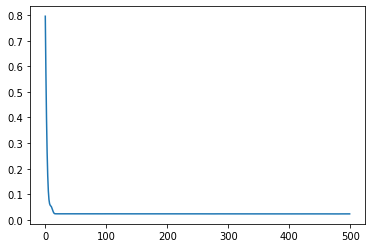

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN



model = Sequential()
model.add(SimpleRNN(units=1, activation="tanh"))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='rmsprop')
history = model.fit(trainX, trainY, epochs=500, batch_size=16, verbose=2)

loss = history.history['loss']

plt.plot(loss)

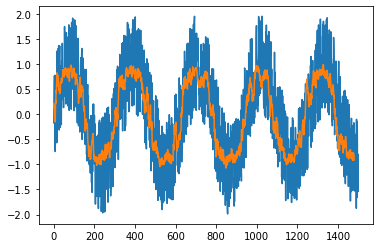

In [ ]:

trainPredict = normalizer.inverse_transform(model.predict(trainX))
testPredict = normalizer.inverse_transform(model.predict(testX))
predicted = np.concatenate((trainPredict, testPredict))
x = normalizer.inverse_transform(x)

plt.plot(x)
plt.plot(predicted)